## **CREDIT SCORE CLASSIFICATION**

### **Loading the required libraries**

In [158]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder,OneHotEncoder,StandardScaler
from sklearn.feature_selection import mutual_info_classif
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,ConfusionMatrixDisplay,precision_recall_curve, f1_score, auc
from sklearn.model_selection import KFold,cross_val_score,RandomizedSearchCV

### **Loading the credit dataset**

In [ ]:
#To view the entire columns
pd.set_option('display.max_columns', None)

credit = pd.read_csv('/content/credit.csv')



### **Data understanding**

In [ ]:
#size of the data
credit.shape

(100000, 28)

There are 100000 rows and 28 columns in this data.

In [ ]:
credit.head(5)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,7.0,11.27,4.0,Good,809.98,26.822620,265.0,No,49.574949,21.46538,High_spent_Small_value_payments,312.494089,Good
1,5635,3392,2,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,4.0,11.27,4.0,Good,809.98,31.944960,266.0,No,49.574949,21.46538,Low_spent_Large_value_payments,284.629162,Good
2,5636,3392,3,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,7.0,11.27,4.0,Good,809.98,28.609352,267.0,No,49.574949,21.46538,Low_spent_Medium_value_payments,331.209863,Good
3,5637,3392,4,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5.0,4.0,6.27,4.0,Good,809.98,31.377862,268.0,No,49.574949,21.46538,Low_spent_Small_value_payments,223.451310,Good
4,5638,3392,5,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6.0,4.0,11.27,4.0,Good,809.98,24.797347,269.0,No,49.574949,21.46538,High_spent_Medium_value_payments,341.489231,Good


In [ ]:
pd.set_option('display.max_columns', None)

credit.tail(5)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
99995,155625,37932,4,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,6.0,7.0,2.0,"Auto Loan, and Student Loan",23.0,7.0,11.5,3.0,Good,502.38,34.663572,378.0,No,35.104023,24.028477,High_spent_Large_value_payments,479.866228,Poor
99996,155626,37932,5,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,6.0,7.0,2.0,"Auto Loan, and Student Loan",18.0,7.0,11.5,3.0,Good,502.38,40.565631,379.0,No,35.104023,24.028477,High_spent_Medium_value_payments,496.651610,Poor
99997,155627,37932,6,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,6.0,7.0,2.0,"Auto Loan, and Student Loan",27.0,6.0,11.5,3.0,Good,502.38,41.255522,380.0,No,35.104023,24.028477,High_spent_Large_value_payments,516.809083,Poor
99998,155628,37932,7,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,6.0,7.0,2.0,"Auto Loan, and Student Loan",20.0,6.0,11.5,3.0,Good,502.38,33.638208,381.0,No,35.104023,24.028477,Low_spent_Large_value_payments,319.164979,Standard
99999,155629,37932,8,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,6.0,7.0,2.0,"Auto Loan, and Student Loan",18.0,6.0,11.5,3.0,Good,502.38,34.192463,382.0,No,35.104023,24.028477,High_spent_Medium_value_payments,393.673696,Poor


In [ ]:
#Basic information about the data
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  int64  
 1   Customer_ID               100000 non-null  int64  
 2   Month                     100000 non-null  int64  
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  float64
 5   SSN                       100000 non-null  float64
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  float64
 10  Num_Credit_Card           100000 non-null  float64
 11  Interest_Rate             100000 non-null  float64
 12  Num_of_Loan               100000 non-null  float64
 13  Type_of_Loan              100000 non-null  ob

18 columns are of float type,3 are of integer type and 7 are of object type.

In [ ]:
#columns in data
credit.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

### **Data Cleaning**

In [ ]:
# Check unique for missing value or incorrect data
for i in credit:
  print(i)
  print(credit[i].unique(),'\n')
  print('------------------')

ID
[  5634   5635   5636 ... 155627 155628 155629] 

------------------
Customer_ID
[ 3392  8625 11708 ... 44897 34304 37932] 

------------------
Month
[1 2 3 4 5 6 7 8] 

------------------
Name
['Aaron Maashoh' 'Rick Rothackerj' 'Langep' ... 'Chris Wickhamm'
 'Sarah McBridec' 'Nicks'] 

------------------
Age
[23. 28. 34. 54. 55. 21. 31. 33. 30. 24. 44. 45. 40. 41. 32. 35. 36. 39.
 37. 20. 46. 26. 42. 19. 48. 38. 43. 22. 16. 18. 15. 27. 25. 14. 17. 47.
 53. 56. 29. 49. 51. 50. 52.] 

------------------
SSN
[8.21000265e+08 4.07583900e+06 4.86853974e+08 ... 1.33167738e+08
 3.13509420e+07 7.87359900e+07] 

------------------
Occupation
['Scientist' 'Teacher' 'Engineer' 'Entrepreneur' 'Developer' 'Lawyer'
 'Media_Manager' 'Doctor' 'Journalist' 'Manager' 'Accountant' 'Musician'
 'Mechanic' 'Writer' 'Architect'] 

------------------
Annual_Income
[ 19114.12  34847.84 143162.64 ...  37188.1   20002.88  39628.99] 

------------------
Monthly_Inhand_Salary
[ 1824.84333333  3037.98666667 1218

In [ ]:
#checking the Type_of_Loan column
credit['Type_of_Loan'].value_counts()

Type_of_Loan
No Data                                                                                                                               11408
Not Specified                                                                                                                          1408
Credit-Builder Loan                                                                                                                    1280
Personal Loan                                                                                                                          1272
Debt Consolidation Loan                                                                                                                1264
                                                                                                                                      ...  
Not Specified, Mortgage Loan, Auto Loan, and Payday Loan                                                                                  8
Payday 

In [ ]:
#Droping the columns which doesn't provide any relevent information to the model
col_to_drop = ['ID','Customer_ID','Month','Name','SSN','Type_of_Loan']
new_credit = credit.drop(col_to_drop,axis=1)
new_credit.head(5)

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,11.27,4.0,Good,809.98,26.822620,265.0,No,49.574949,21.46538,High_spent_Small_value_payments,312.494089,Good
1,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,4.0,11.27,4.0,Good,809.98,31.944960,266.0,No,49.574949,21.46538,Low_spent_Large_value_payments,284.629162,Good
2,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,11.27,4.0,Good,809.98,28.609352,267.0,No,49.574949,21.46538,Low_spent_Medium_value_payments,331.209863,Good
3,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,5.0,4.0,6.27,4.0,Good,809.98,31.377862,268.0,No,49.574949,21.46538,Low_spent_Small_value_payments,223.451310,Good
4,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,6.0,4.0,11.27,4.0,Good,809.98,24.797347,269.0,No,49.574949,21.46538,High_spent_Medium_value_payments,341.489231,Good


In [ ]:
#check for missing values
new_credit.isna().sum()

Age                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

No missing values

In [ ]:
#Check for duplicates
new_credit[new_credit.duplicated()]

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score


No duplicates

Boxplot for Annual_Income


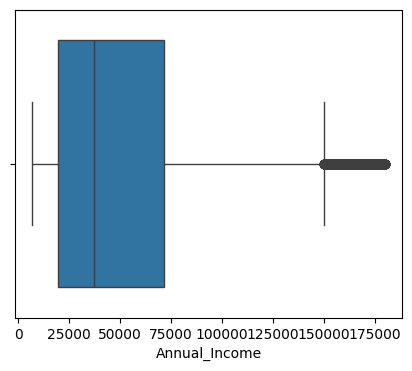



Boxplot for Monthly_Inhand_Salary


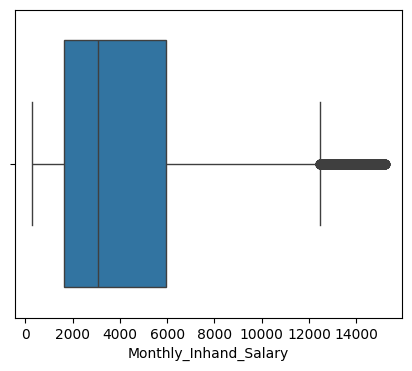



Boxplot for Outstanding_Debt


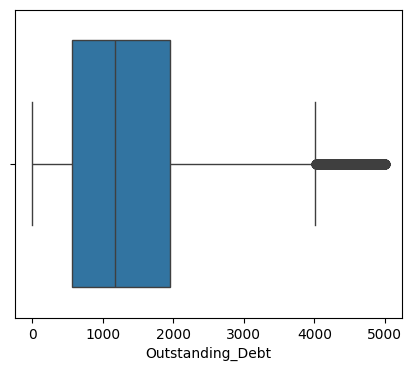



Boxplot for Total_EMI_per_month


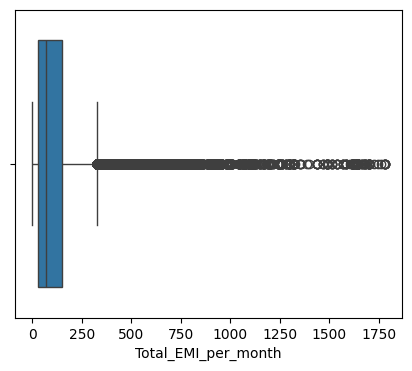



Boxplot for Amount_invested_monthly


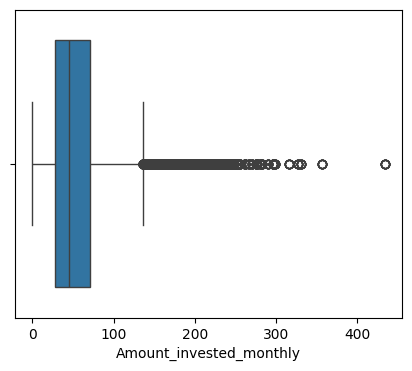



Boxplot for Monthly_Balance


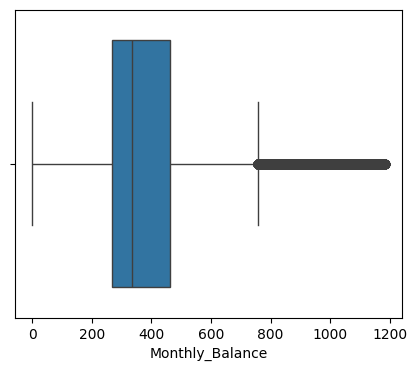

In [ ]:
#Outlier Analysis
col_to_analyse = ['Annual_Income','Monthly_Inhand_Salary','Outstanding_Debt','Total_EMI_per_month','Amount_invested_monthly','Monthly_Balance']

for i in col_to_analyse:
  print('Boxplot for',i)
  plt.figure(figsize=(5,4))
  sns.boxplot(new_credit,x=new_credit[i])
  plt.show()
  print('\n')

### **Exploratory Data Analysis (EDA)**

### **Data description**

In [ ]:
#Statistical informations of data

#Of numeric columns
new_credit.describe(include=[np.number])


,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,33.316340,50505.123449,4197.270835,5.368820,5.533570,14.53208,3.532880,21.08141,13.313120,10.470323,5.798250,1426.220376,32.285173,221.220460,107.699208,55.101315,392.697586
std,10.764812,38299.422093,3186.432497,2.593314,2.067098,8.74133,2.446356,14.80456,6.237166,6.609481,3.867826,1155.129026,5.116875,99.680716,132.267056,39.006932,201.652719
min,14.000000,7005.930000,303.645417,0.000000,0.000000,1.00000,0.000000,0.00000,0.000000,0.500000,0.000000,0.230000,20.000000,1.000000,0.000000,0.000000,0.007760
25%,24.000000,19342.972500,1626.594167,3.000000,4.000000,7.00000,2.000000,10.00000,9.000000,5.380000,3.000000,566.072500,28.052567,144.000000,29.268886,27.959111,267.615983
50%,33.000000,36999.705000,3095.905000,5.000000,5.000000,13.00000,3.000000,18.00000,14.000000,9.400000,5.000000,1166.155000,32.305784,219.000000,66.462304,45.156550,333.865366
75%,42.000000,71683.470000,5957.715000,7.000000,7.000000,20.00000,5.000000,28.00000,18.000000,14.850000,8.000000,1945.962500,36.496663,302.000000,147.392573,71.295797,463.215683
max,56.000000,179987.280000,15204.633333,11.000000,11.000000,34.00000,9.000000,62.00000,25.000000,29.980000,17.000000,4998.070000,50.000000,404.000000,1779.103254,434.191089,1183.930696


In [ ]:
new_credit.describe(include=[object])

,Occupation,Credit_Mix,Payment_of_Min_Amount,Payment_Behaviour,Credit_Score
count,100000,100000,100000,100000,100000
unique,15,3,3,6,3
top,Lawyer,Standard,Yes,Low_spent_Small_value_payments,Standard
freq,7096,45848,52326,28616,53174


### **Inference:**

*   Most of the individual are Lawyers.
*   Majority of individuals have a 'Standard' credit score.
*   Payment behavior of most of the individuals is 'Low_spent_Small_value_payments'.
*   There are 15 different occupation categories.





### **Data Visualization**

**How is the dataset distributed across different occupations?**

In [ ]:
new_credit['Occupation'].value_counts()

Occupation
Lawyer           7096
Engineer         6864
Architect        6824
Mechanic         6776
Scientist        6744
Accountant       6744
Developer        6720
Media_Manager    6720
Teacher          6672
Entrepreneur     6648
Doctor           6568
Journalist       6536
Manager          6432
Musician         6352
Writer           6304
Name: count, dtype: int64

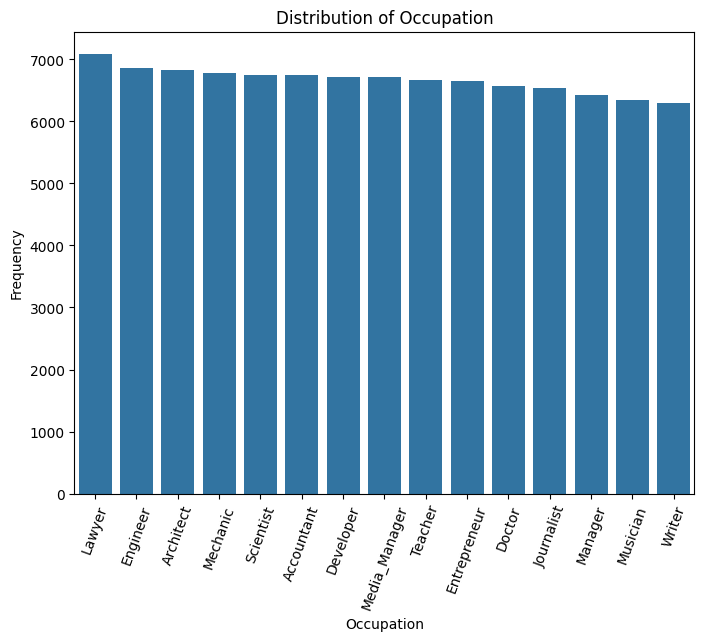

In [ ]:
plt.figure(figsize = (8,6))
sns.barplot(x=new_credit['Occupation'].value_counts().index, y=new_credit['Occupation'].value_counts())
plt.xlabel('Occupation')
plt.ylabel('Frequency')
plt.title('Distribution of Occupation')
plt.xticks(rotation = 70)
plt.show()

Occupation is almost equally distributed.But there are more individuals in Lawyer category when compared to others.

 **What is the distribution of ages among individuals in the dataset?**

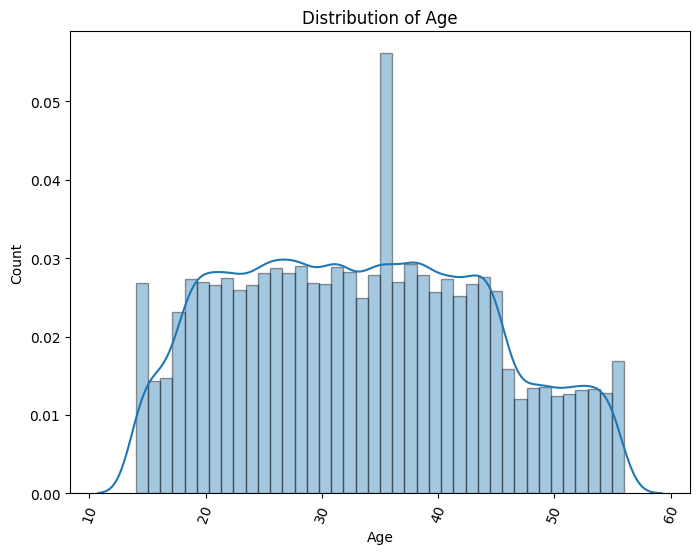

In [ ]:
plt.figure(figsize = (8,6))
sns.distplot(x=new_credit['Age'],kde=True,bins = 40,hist=True,hist_kws={"edgecolor": "black"})
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Age')
plt.xticks(rotation = 70)
plt.show()

Majority of the individuals are in the age group of 18-45.

**How many loans do individuals typically have?**

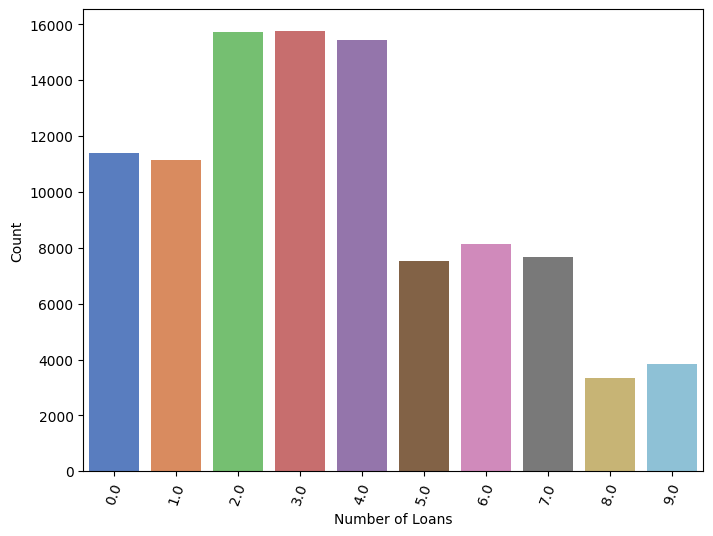

In [ ]:
plt.figure(figsize = (8,6))
sns.countplot(x=new_credit['Num_of_Loan'],palette='muted')
plt.xlabel('Number of Loans')
plt.ylabel('Count')
plt.xticks(rotation = 70)
plt.show()

Majority of the individuals have 0 to 4 loans.

**Is there a relationship between the number of bank accounts and the number of credit cards individuals have?**

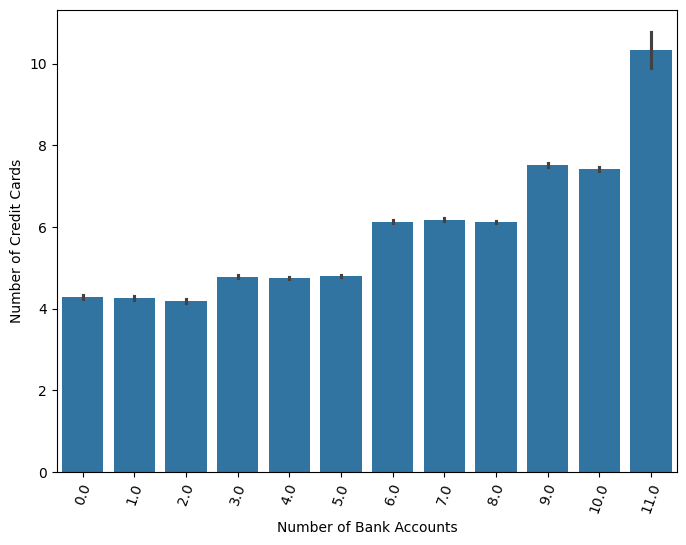

In [ ]:
plt.figure(figsize = (8,6))
sns.barplot(x=new_credit['Num_Bank_Accounts'], y=new_credit['Num_Credit_Card'])
plt.xlabel('Number of Bank Accounts')
plt.ylabel('Number of Credit Cards')
plt.xticks(rotation = 70)
plt.show()

Those who have more bank accounts, they have more credit cards.

**How do individuals behave in terms of payment ?**

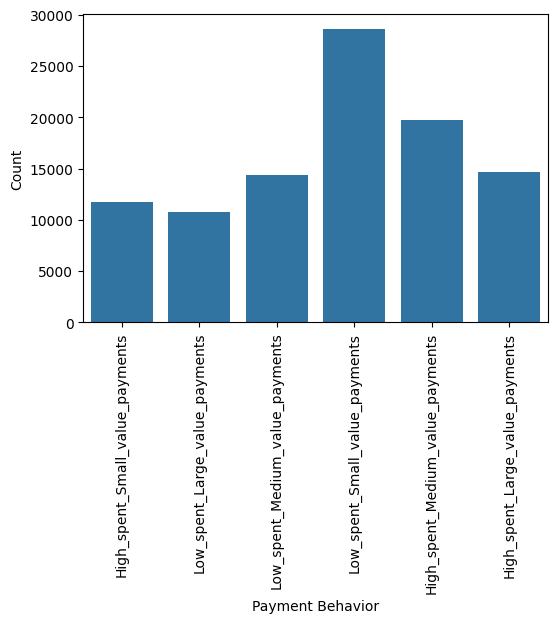

In [ ]:
plt.figure(figsize = (6,4))
sns.countplot(x=new_credit['Payment_Behaviour'])
plt.xlabel('Payment Behavior')
plt.ylabel('Count')
plt.xticks(rotation = 90)
plt.show()

Most of the individuals have 'Low_spent_small_value_payments' behavior.

**Does an individual's payment behavior have an observable impact on their credit score?**

<Figure size 1000x600 with 0 Axes>

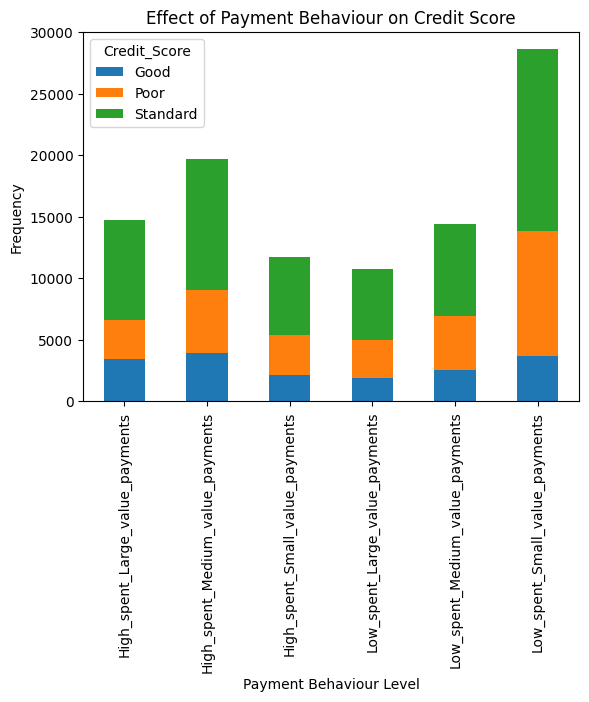

In [ ]:
plt.figure(figsize=(10, 6))
pd.crosstab(new_credit['Payment_Behaviour'],new_credit['Credit_Score']).plot(kind='bar', stacked=True)
plt.xlabel('Payment Behaviour Level')
plt.ylabel('Frequency')
plt.title('Effect of Payment Behaviour on Credit Score')
plt.show()

**What is the distribution of credit scores among individuals?**

In [ ]:
credit_score = new_credit['Credit_Score'].value_counts()
credit_score

Credit_Score
Standard    53174
Poor        28998
Good        17828
Name: count, dtype: int64

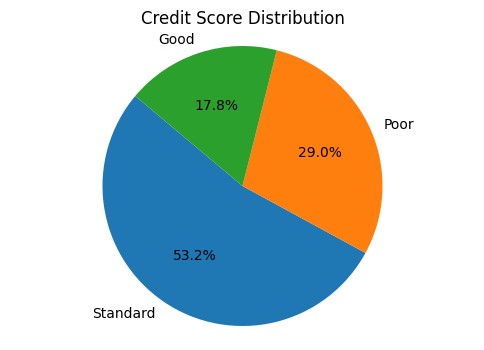

In [ ]:
plt.figure(figsize = (6,4))
plt.pie(credit_score, labels=credit_score.index, autopct='%1.1f%%', startangle=140)
plt.title('Credit Score Distribution')
plt.axis('equal')
plt.show()

Majority of the individuals have standard as credit score.

**How the occupation and credit score of individuals are related?**

<Figure size 1000x600 with 0 Axes>

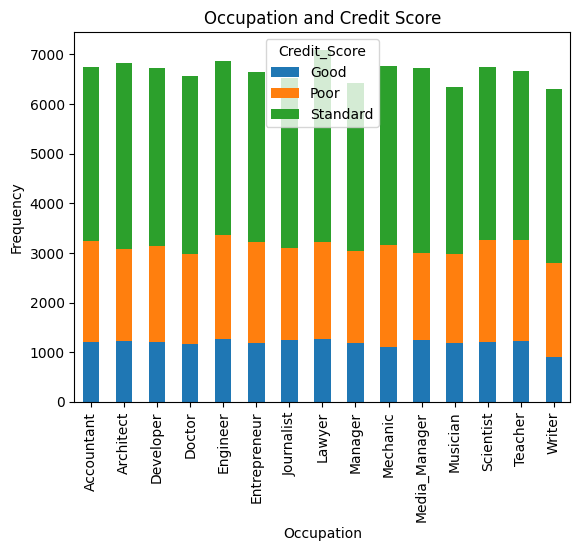

In [ ]:
plt.figure(figsize=(10, 6))
pd.crosstab(new_credit['Occupation'],new_credit['Credit_Score']).plot(kind='bar', stacked=True)
plt.xlabel('Occupation')
plt.ylabel('Frequency')
plt.title('Occupation and Credit Score')
plt.show()

**If there is any relation between credit mix and credit score?**

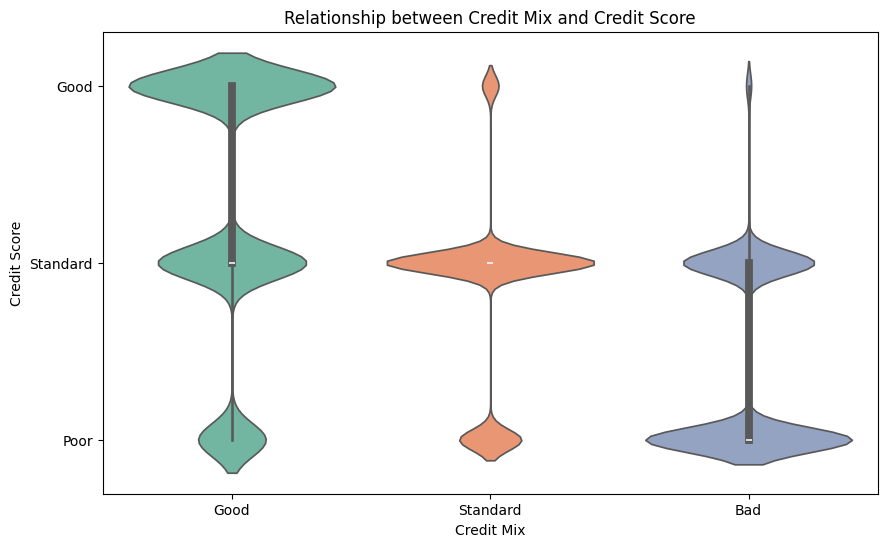

In [ ]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Credit_Mix', y='Credit_Score', data=new_credit, palette='Set2')
plt.title('Relationship between Credit Mix and Credit Score')
plt.xlabel('Credit Mix')
plt.ylabel('Credit Score')
plt.show()

**Is there a correlation between individuals' income levels, monthly inhand salary, and their credit score categories?**

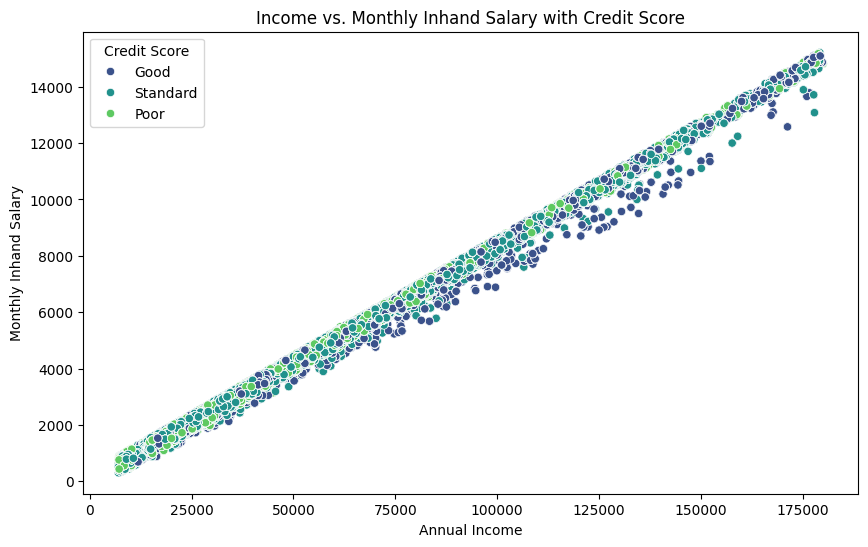

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual_Income', y='Monthly_Inhand_Salary', hue='Credit_Score', data=new_credit, palette='viridis')
plt.title('Income vs. Monthly Inhand Salary with Credit Score')
plt.xlabel('Annual Income')
plt.ylabel('Monthly Inhand Salary')
plt.legend(title='Credit Score')
plt.show()

**If there is any relation between interest rate and credit score?**

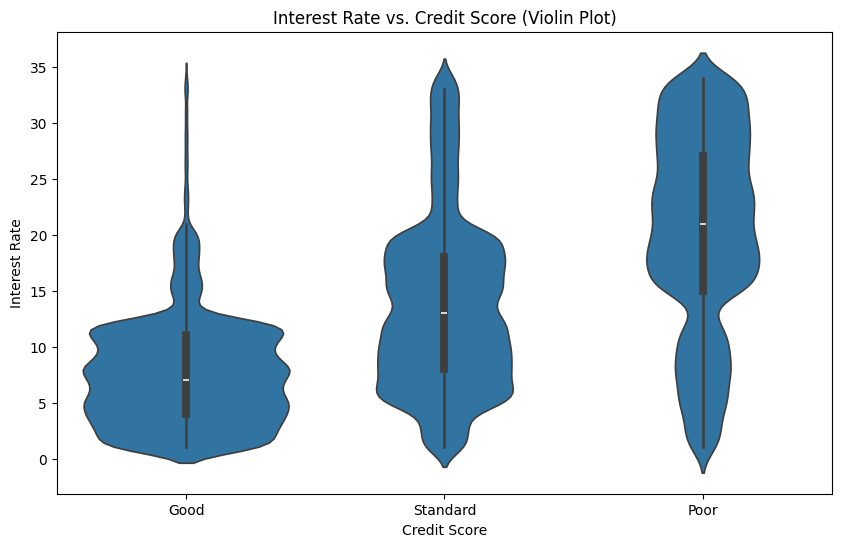

In [ ]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Credit_Score', y='Interest_Rate', data=new_credit)
plt.title('Interest Rate vs. Credit Score (Violin Plot)')
plt.xlabel('Credit Score')
plt.ylabel('Interest Rate')
plt.show()

### **Creating Feature and Target Variables**

In [ ]:
X_raw = new_credit.drop(['Credit_Score'],axis=1) #Feature variable
y = new_credit['Credit_Score'] #Target variable

### **Feature Selection**

In [ ]:
datatypes = X_raw.dtypes

#Numerical Columns
num_columns = X_raw.columns[(datatypes == 'float64') | (datatypes == 'int64')]
print('Numerical Columns \n',num_columns)


Numerical Columns 
 Index(['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
       'Credit_History_Age', 'Total_EMI_per_month', 'Amount_invested_monthly',
       'Monthly_Balance'],
      dtype='object')


In [ ]:
#Selecting Numerical columns using Information Gain

mutual_info = mutual_info_classif(X_raw[num_columns],y)
mutual_info

array([0.02536791, 0.62442151, 0.62256045, 0.10268426, 0.11508686,
       0.16838013, 0.0911617 , 0.12240104, 0.09228396, 0.10165951,
       0.11721042, 0.61381504, 0.        , 0.09993282, 0.56598011,
       0.61780201, 0.03715619])

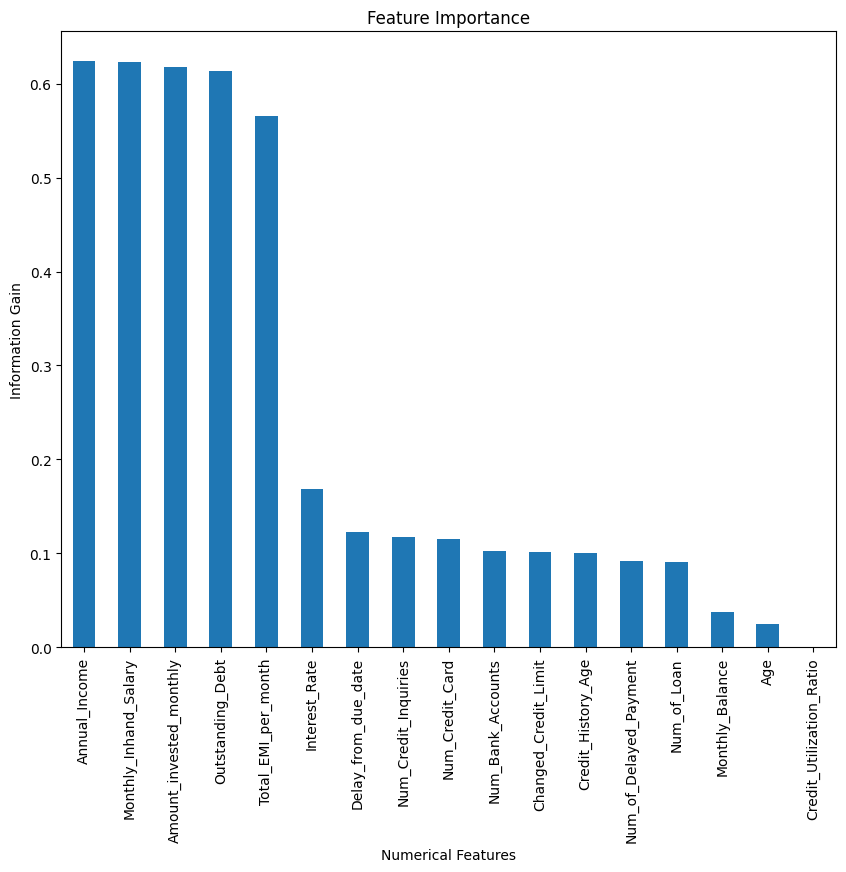

In [ ]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = num_columns
mutual_info.sort_values(ascending = False,inplace = True)

#Plot the values in ascending order
plt.figure(figsize=(10,8))
mutual_info.plot.bar()
plt.title('Feature Importance')
plt.xlabel('Numerical Features')
plt.ylabel('Information Gain')
plt.show()

In [ ]:
cat_features = X_raw.columns[datatypes == 'object']

# Initialize a dictionary to store Chi-square test results
chi2_results = {}

# Iterate over each categorical feature
for feature in cat_features:
    # Create a contingency table between the current feature and the target variable
    contingency_table = pd.crosstab(new_credit[feature], new_credit['Credit_Score'])

    # Perform Chi-square test
    chi2, p_value, _, _ = chi2_contingency(contingency_table)

    # Store Chi-square test results in the dictionary
    chi2_results[feature] = {'chi2': chi2, 'p_value': p_value}

# Print Chi-square test results
for feature, result in chi2_results.items():
    print(f"Chi-square Test Results for {feature}:")
    print(f"\tChi-square: {result['chi2']}, p-value: {result['p_value']}")

Chi-square Test Results for Occupation:
	Chi-square: 180.68588839512742, p-value: 2.907103747503745e-24
Chi-square Test Results for Credit_Mix:
	Chi-square: 40489.41766158057, p-value: 0.0
Chi-square Test Results for Payment_of_Min_Amount:
	Chi-square: 19620.394791233222, p-value: 0.0
Chi-square Test Results for Payment_Behaviour:
	Chi-square: 1540.3973697187996, p-value: 0.0


In [ ]:
#Selected Features for model trainining

# Get the indices of the top 10 values from mutual_info (important Numerical features)
top_10_mutual_info_indices = mutual_info.index[:10]

# Combine the indices into a single list
combined_indices = list(top_10_mutual_info_indices) + ['Credit_Mix']

X_selected = X_raw[combined_indices]

X_selected.columns

Index(['Annual_Income', 'Monthly_Inhand_Salary', 'Amount_invested_monthly',
       'Outstanding_Debt', 'Total_EMI_per_month', 'Interest_Rate',
       'Delay_from_due_date', 'Num_Credit_Inquiries', 'Num_Credit_Card',
       'Num_Bank_Accounts', 'Credit_Mix'],
      dtype='object')

In [ ]:
X = X_selected.copy()
X.head()

,Annual_Income,Monthly_Inhand_Salary,Amount_invested_monthly,Outstanding_Debt,Total_EMI_per_month,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Num_Credit_Card,Num_Bank_Accounts,Credit_Mix
0,19114.12,1824.843333,21.46538,809.98,49.574949,3.0,3.0,4.0,4.0,3.0,Good
1,19114.12,1824.843333,21.46538,809.98,49.574949,3.0,3.0,4.0,4.0,3.0,Good
2,19114.12,1824.843333,21.46538,809.98,49.574949,3.0,3.0,4.0,4.0,3.0,Good
3,19114.12,1824.843333,21.46538,809.98,49.574949,3.0,5.0,4.0,4.0,3.0,Good
4,19114.12,1824.843333,21.46538,809.98,49.574949,3.0,6.0,4.0,4.0,3.0,Good


### **Scaling and Encoding**

In [ ]:
# List of columns to scale
columns_to_scale = ['Annual_Income', 'Monthly_Inhand_Salary', 'Amount_invested_monthly',
                    'Outstanding_Debt', 'Total_EMI_per_month',
                    'Delay_from_due_date']

# List of columns to one-hot encode
column_to_encode = ['Credit_Mix']

# Instantiate StandardScaler
scaler = StandardScaler()

# Fit and transform the scaler on the columns to scale
scaler = scaler.fit(X[columns_to_scale])
scaled_data = scaler.transform(X[columns_to_scale])

# Convert the scaled data into a DataFrame
scaled_df = pd.DataFrame(scaled_data, columns=columns_to_scale)

# Instantiate OneHotEncoder
encoder = OneHotEncoder()

# Fit and transform the encoder on the column to one-hot encode
onehot_encoder = encoder.fit(X[column_to_encode])
encoded_data = onehot_encoder.transform(X[column_to_encode])

# Convert the encoded data into a DataFrame
encoded_df = pd.DataFrame(encoded_data.toarray(), columns=encoder.get_feature_names_out(column_to_encode))

# Concatenate the scaled DataFrame and the encoded DataFrame with the original DataFrame
transformed_df = pd.concat([scaled_df, encoded_df, X.drop(columns_to_scale + column_to_encode, axis=1)], axis=1)

# Display the transformed DataFrame
print(transformed_df.head())

   Annual_Income  Monthly_Inhand_Salary  Amount_invested_monthly  \
0      -0.819625              -0.744544                -0.862311   
1      -0.819625              -0.744544                -0.862311   
2      -0.819625              -0.744544                -0.862311   
3      -0.819625              -0.744544                -0.862311   
4      -0.819625              -0.744544                -0.862311   

   Outstanding_Debt  Total_EMI_per_month  Delay_from_due_date  Credit_Mix_Bad  \
0         -0.533485            -0.439448            -1.221347             0.0   
1         -0.533485            -0.439448            -1.221347             0.0   
2         -0.533485            -0.439448            -1.221347             0.0   
3         -0.533485            -0.439448            -1.086253             0.0   
4         -0.533485            -0.439448            -1.018705             0.0   

   Credit_Mix_Good  Credit_Mix_Standard  Interest_Rate  Num_Credit_Inquiries  \
0              1.0      

In [ ]:
X_new = transformed_df.copy()

In [ ]:
#Encode the target variable y

encoder2 = LabelEncoder()
encoder2 = encoder2.fit(y)
y = encoder2.transform(y)

In [ ]:
y

array([0, 0, 0, ..., 1, 2, 1])

### **Data Split**

**Train split**

In [ ]:
X_train,X_temp,y_train,y_temp = train_test_split(X_new,y,test_size=0.25,random_state=42,shuffle=True)
print(X_train.shape)
print(X_temp.shape)
print(y_train.shape)
print(y_temp.shape)

(75000, 13)
(25000, 13)
(75000,)
(25000,)


**Train,Validation split**

In [ ]:
X_val,X_test,y_val,y_test = train_test_split(X_temp,y_temp,test_size=0.5,random_state=42,shuffle=True)
print(X_val.shape)
print(X_test.shape)
print(y_val.shape)
print(y_test.shape)

(12500, 13)
(12500, 13)
(12500,)
(12500,)


### **Model Selection**

In [ ]:
#1.K-Nearest Neighbours
from sklearn.neighbors import KNeighborsClassifier

#2.Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

#3.Support Vector Machine
from sklearn.svm import SVC

#4.Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

#5.Naive Bayes
from sklearn.naive_bayes import GaussianNB

### **Model Training and Evaluation**

KNN Accuracy :  0.78632
Classification Report of KNN :                precision    recall  f1-score   support

           0       0.72      0.77      0.74      2239
           1       0.78      0.80      0.79      3612
           2       0.82      0.78      0.80      6649

    accuracy                           0.79     12500
   macro avg       0.77      0.79      0.78     12500
weighted avg       0.79      0.79      0.79     12500



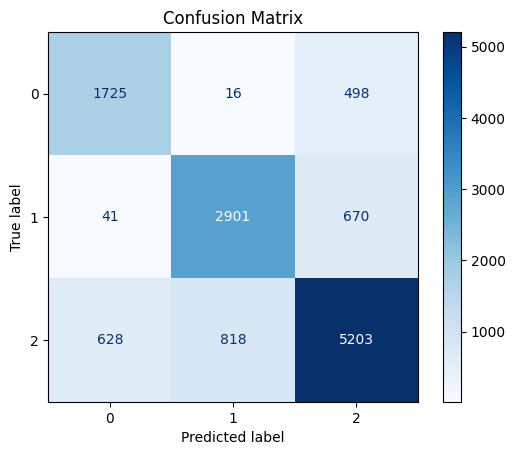

In [ ]:
#1.K-Nearest Neighbours

#Initialize KNN
knn = KNeighborsClassifier(n_neighbors=3,metric='euclidean')

#Fitting the model
knn = knn.fit(X_train,y_train)

#Prediction using Validation set
knn_pred = knn.predict(X_val)

#Evaluation
print('KNN Accuracy : ',accuracy_score(y_val,knn_pred))
print('Classification Report of KNN : ',classification_report(y_val,knn_pred))
cm = confusion_matrix(y_val,knn_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

In [ ]:
labels = encoder2.inverse_transform(y)
labels

array(['Good', 'Good', 'Good', ..., 'Poor', 'Standard', 'Poor'],
      dtype=object)

In [ ]:
y

array([0, 0, 0, ..., 1, 2, 1])

In [ ]:
label_df = pd.DataFrame({'Y_labels': labels, 'Y_encoded': y})
label_df

,Y_labels,Y_encoded
0,Good,0
1,Good,0
2,Good,0
3,Good,0
4,Good,0
...,...,...
99995,Poor,1
99996,Poor,1
99997,Poor,1
99998,Standard,2


Decision Tree Classifier Accuracy :  0.69
Classification Report of Decision Tree Classifier : 
               precision    recall  f1-score   support

           0       0.58      0.64      0.61      2239
           1       0.68      0.65      0.67      3612
           2       0.73      0.73      0.73      6649

    accuracy                           0.69     12500
   macro avg       0.67      0.67      0.67     12500
weighted avg       0.69      0.69      0.69     12500



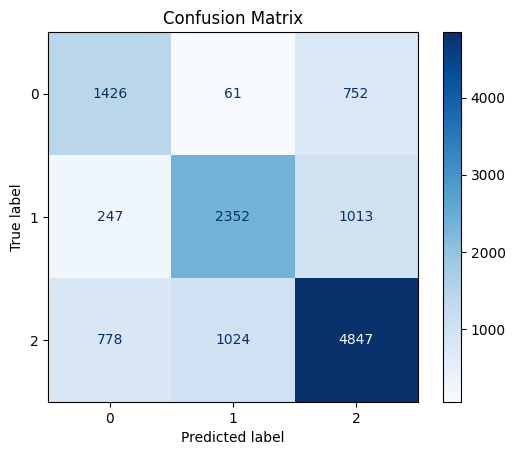

In [ ]:
#2.Decision Tree Classifier

#Initialize Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(max_depth=7,criterion='entropy')

#Fitting the model
dt_classifier = dt_classifier.fit(X_train,y_train)

#Prediction using Validation set
dt_pred = dt_classifier.predict(X_val)

#Evaluation
print('Decision Tree Classifier Accuracy : ',accuracy_score(y_val,dt_pred))
print('Classification Report of Decision Tree Classifier : \n',classification_report(y_val,dt_pred))
cm1 = confusion_matrix(y_val,dt_pred)

disp1 = ConfusionMatrixDisplay(confusion_matrix=cm1)
disp1.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

SVC Accuracy :  0.67064
Classification Report of SVC :                precision    recall  f1-score   support

           0       0.51      0.79      0.62      2239
           1       0.65      0.66      0.66      3612
           2       0.79      0.64      0.70      6649

    accuracy                           0.67     12500
   macro avg       0.65      0.70      0.66     12500
weighted avg       0.70      0.67      0.67     12500



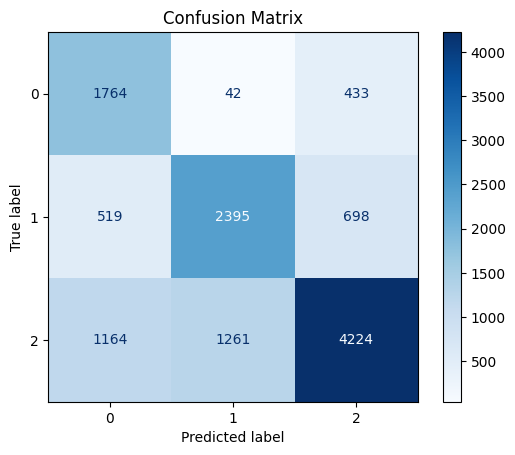

In [ ]:
#3.Support Vector Machine

#Initialize Support Vector Machine
sv_classifier = SVC(C=1)

#Fitting the model
sv_classifier = sv_classifier.fit(X_train,y_train)

#Prediction using Validation set
svc_pred = sv_classifier.predict(X_val)

#Evaluation
print('SVC Accuracy : ',accuracy_score(y_val,svc_pred))
print('Classification Report of SVC : ',classification_report(y_val,svc_pred))
cm2 = confusion_matrix(y_val,svc_pred)

disp2 = ConfusionMatrixDisplay(confusion_matrix=cm2)
disp2.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

Random Forest Classifier Accuracy :  0.8032
Classification Report of Random Forest Classifier : 
               precision    recall  f1-score   support

           0       0.76      0.79      0.77      2239
           1       0.79      0.83      0.81      3612
           2       0.83      0.80      0.81      6649

    accuracy                           0.80     12500
   macro avg       0.79      0.80      0.80     12500
weighted avg       0.80      0.80      0.80     12500



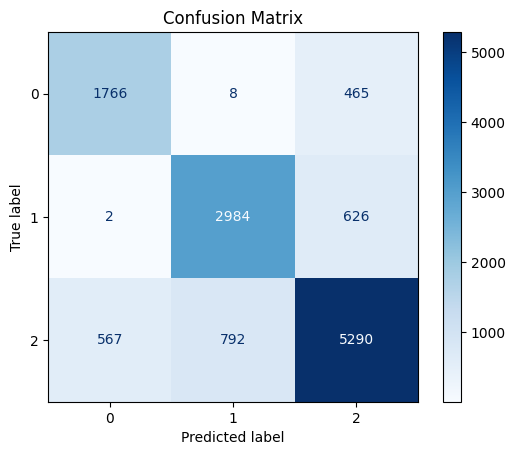

In [ ]:
#4.Random Forest Classifier

#Initialize Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=200)

#Fitting the model
rf_classifier = rf_classifier.fit(X_train,y_train)

#Prediction using Validation set
rf_pred = rf_classifier.predict(X_val)

#Evaluation
print('Random Forest Classifier Accuracy : ',accuracy_score(y_val,rf_pred))
print('Classification Report of Random Forest Classifier : \n',classification_report(y_val,rf_pred))
cm3 = confusion_matrix(y_val,rf_pred)

disp3 = ConfusionMatrixDisplay(confusion_matrix=cm3)
disp3.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

Naive Bayes Accuracy :  0.65344
Classification Report of Naive Bayes : 
               precision    recall  f1-score   support

           0       0.49      0.84      0.62      2239
           1       0.64      0.64      0.64      3612
           2       0.80      0.60      0.68      6649

    accuracy                           0.65     12500
   macro avg       0.64      0.69      0.65     12500
weighted avg       0.70      0.65      0.66     12500



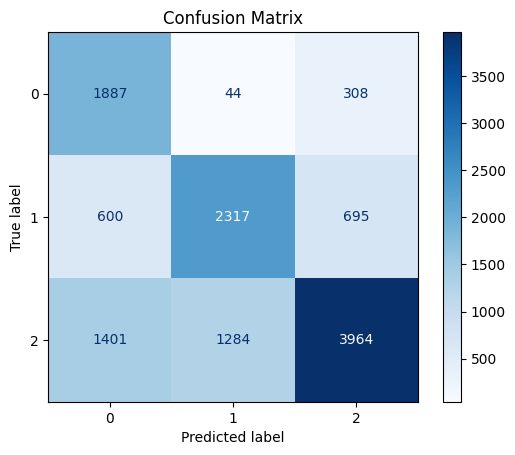

In [ ]:
#5.Naive Bayes

#Initialize KNN
nb = GaussianNB()

#Fitting the model
nb = nb.fit(X_train,y_train)

#Prediction using Validation set
nb_pred = nb.predict(X_val)

#Evaluation
print('Naive Bayes Accuracy : ',accuracy_score(y_val,nb_pred))
print('Classification Report of Naive Bayes : \n',classification_report(y_val,nb_pred))
cm4 = confusion_matrix(y_val,nb_pred)

disp4 = ConfusionMatrixDisplay(confusion_matrix=cm4)
disp4.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

### **KFold Cross Validation**

In [ ]:
models = [
    ("K-Nearest Neighbours", KNeighborsClassifier()),
    ("Decision Tree Classifier", DecisionTreeClassifier()),
    ("Support Vector Machine", SVC()),
    ("Random Forest Classifier", RandomForestClassifier()),
    ("Naive Bayes", GaussianNB())
]

kfold = KFold(5)

kf_dict = {"Model": [], "Mean Cross Validation Score": []}

for name,model in models:

  #Find cross val score
  cv_result = cross_val_score(model,X_new,y,cv=kfold)

  #Average score
  cv_avg = np.mean(cv_result)

  kf_dict["Model"].append(name)
  kf_dict["Mean Cross Validation Score"].append(cv_avg)


kfold_df = pd.DataFrame(kf_dict)

print(kfold_df)

                      Model  Mean Cross Validation Score
0      K-Nearest Neighbours                      0.60868
1  Decision Tree Classifier                      0.59054
2    Support Vector Machine                      0.66999
3  Random Forest Classifier                      0.68178
4               Naive Bayes                      0.65421


### **Hyperparameter Tuning**

In [161]:
rf_model = RandomForestClassifier()
parameters = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

grid = RandomizedSearchCV(estimator=rf_model,param_distributions=parameters,cv=5)
grid.fit(X_train,y_train)

#get the best hyperparameters
print('Best hyperparameters :',grid.best_params_)

#Get best model
best_model = grid.best_estimator_

#Evaluate the best model on the test set
y_pred = best_model.predict(X_test)



Best hyperparameters : {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 20}


### **Model Interpretability**

In [165]:
#Feature importance
feature_imp = best_model.feature_importances_
feature_imp

array([0.06439091, 0.06342929, 0.06287906, 0.18422652, 0.0698137 ,
       0.08853614, 0.02897718, 0.07801483, 0.08332538, 0.10869378,
       0.06272713, 0.0606554 , 0.04433071])

### **Kfold Cross Validation**

In [164]:
kf = KFold(n_splits=5)
cv_score = cross_val_score(rf_model,X_new,y,cv=kf)
mean_score = np.mean(cv_score)
mean_score

0.6833

### **Perfomance Evaluation**

Random Forest Accuracy :  0.80488
Classification Report of Random Forest : 
               precision    recall  f1-score   support

           0       0.76      0.78      0.77      2183
           1       0.80      0.81      0.80      3701
           2       0.82      0.81      0.82      6616

    accuracy                           0.80     12500
   macro avg       0.79      0.80      0.80     12500
weighted avg       0.81      0.80      0.80     12500



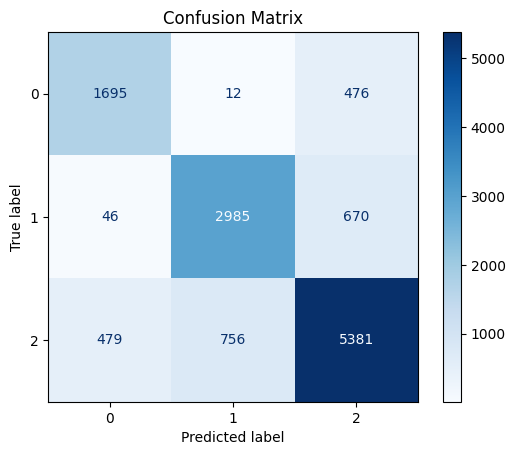

In [163]:
#Evaluation
print('Random Forest Accuracy : ',accuracy_score(y_test,y_pred))
print('Classification Report of Random Forest : \n',classification_report(y_test,y_pred))
cm_rf = confusion_matrix(y_test,y_pred)

disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf)
disp_rf.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()